In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import matplotlib.dates as mdates
from pycoingecko import CoinGeckoAPI

In [54]:
#Cargamos la data
liquidity = pd.read_csv('csv/gq_all_liquidity_tx.csv')

In [55]:
#Ajustamos los timeStamps
liquidity['timeStamp'] = pd.to_datetime(liquidity['timeStamp'])
liquidity['month'] = liquidity['timeStamp']
liquidity.set_index('timeStamp', inplace=True)

liquidity['month'] = pd.to_datetime(liquidity['month'])
liquidity['month'] = liquidity['month'].dt.strftime('%B')


In [56]:
#Agrupamos por semanas y contamos transacciones
df = liquidity
day_count = df.resample('D').size().reset_index(name='count')

day_count.head()

,timeStamp,count
0,2022-03-03,1214
1,2022-03-04,484
2,2022-03-05,809
3,2022-03-06,869
4,2022-03-07,421


In [75]:
balancesum = df['balance'].resample('D').sum()
balancesum = pd.DataFrame(balancesum)

week_tx = day_count.merge(balancesum, left_on='timeStamp', right_index=True, how='left')
week_tx['timeStamp'] = week_tx['timeStamp'].dt.strftime('%A')

week_tx = week_tx.groupby(['timeStamp']).sum()
week_tx.reset_index(inplace=True)
week_tx

,timeStamp,count,balance
0,Friday,4518,-15730948.96
1,Monday,4987,12589197.00
2,Saturday,3512,16623004.18
3,Sunday,5537,94445399.80
4,Thursday,5284,-3496949.20
5,Tuesday,4782,-6834183.07
6,Wednesday,3848,35770852.74


In [76]:
week_tx['Day_poss'] = [4,0,5,6,3,1,2]

week_tx.sort_values('Day_poss', inplace=True)
week_tx.head()

,timeStamp,count,balance,Day_poss
1,Monday,4987,12589197.00,0
5,Tuesday,4782,-6834183.07,1
6,Wednesday,3848,35770852.74,2
4,Thursday,5284,-3496949.20,3
0,Friday,4518,-15730948.96,4


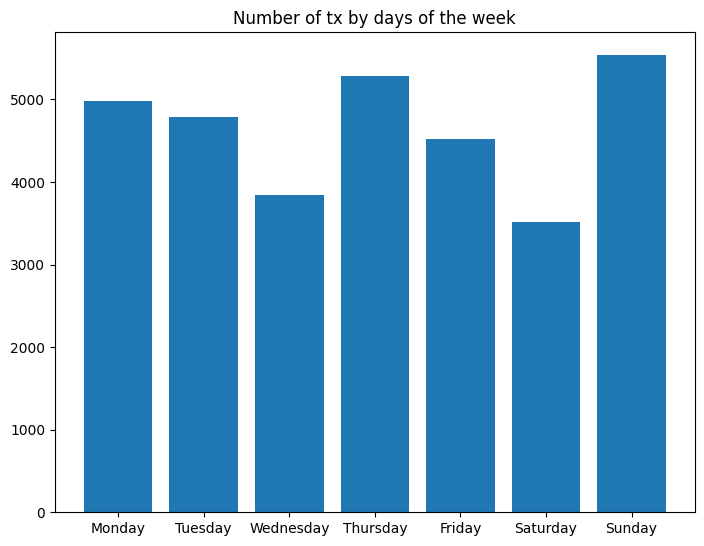

In [79]:
fig = plt.figure()


ax = fig.add_axes([0,0,1,1])
ax.bar(week_tx['timeStamp'],week_tx['count'])
plt.title('Number of tx by days of the week')
plt.show()

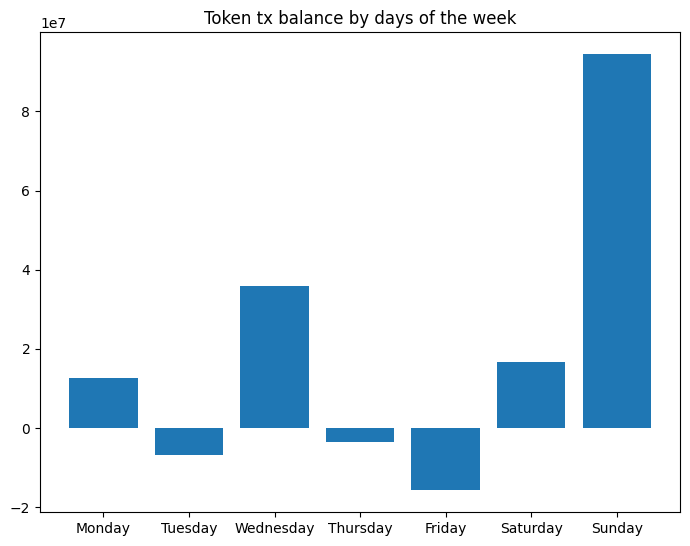

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(week_tx['timeStamp'],week_tx['balance'])
plt.title('Token tx balance by days of the week')
plt.show()